In [2]:
# imports 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [3]:
#reading in data creating debt_income ratio 

df = pd.read_csv('Loan_Data.csv')
customer_id = df['customer_id'].values
credit_lines = df['credit_lines_outstanding'].values
loan_amt_outstanding = df['loan_amt_outstanding'].values
total_debt_outstanding = df['total_debt_outstanding'].values
income =df['income'].values
years_employed = df['years_employed'].values
fico_score = df['fico_score'].values
default = df['default'].values
df['debt_income_ratio'] = total_debt_outstanding/ income
debt_income_ratio = df['debt_income_ratio'].values
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_income_ratio
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.050173
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.308789
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.030787
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.033645
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.075435


18.509999999999998


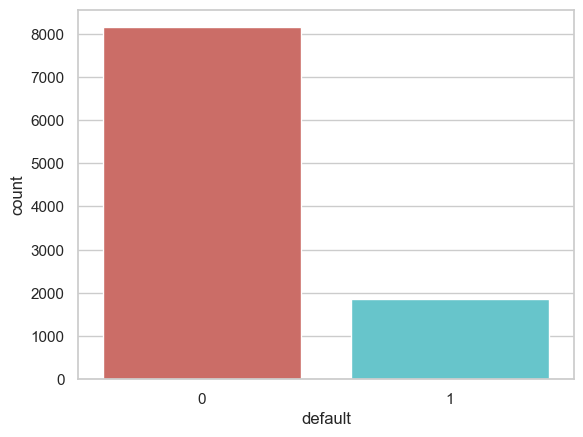

In [4]:
# Data exploration
d = len(df[df['default']==1])
nd = len(df[df['default']==0])
pct_of_default = (d/(d+nd))*100
print(pct_of_default)
sns.countplot(x='default', data=df, palette='hls')
plt.show()
#Clearly unbalanced classes 

In [5]:
df.groupby('default').mean()
#insights
# cridit lines, debt_income_ratio, fico score seem meaningful 

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,debt_income_ratio
default,,,,,,,,
0,4.967005e+06,0.744140,4092.629025,6322.164549,69883.889804,4.765247,646.938765,0.090381
1,5.007914e+06,4.618044,4454.854897,19270.582961,70726.740140,3.617504,596.257699,0.272105


<AxesSubplot:xlabel='credit_lines_outstanding', ylabel='Density'>

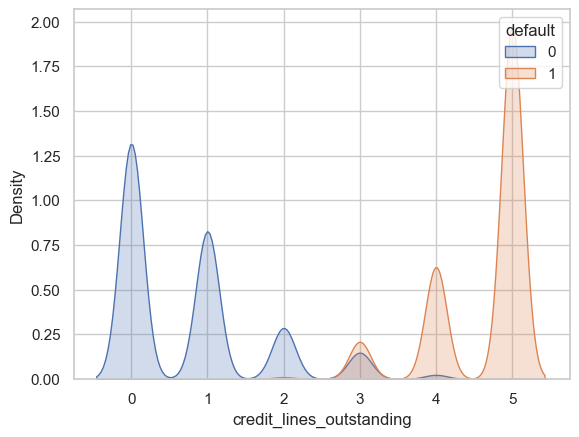

In [6]:
sns.kdeplot( x = df['credit_lines_outstanding'].loc[df['default'] == 0], hue=df['default'] , fill=True)
sns.kdeplot( x = df['credit_lines_outstanding'].loc[df['default'] == 1], hue=df['default'], fill=True)

<AxesSubplot:xlabel='fico_score', ylabel='Density'>

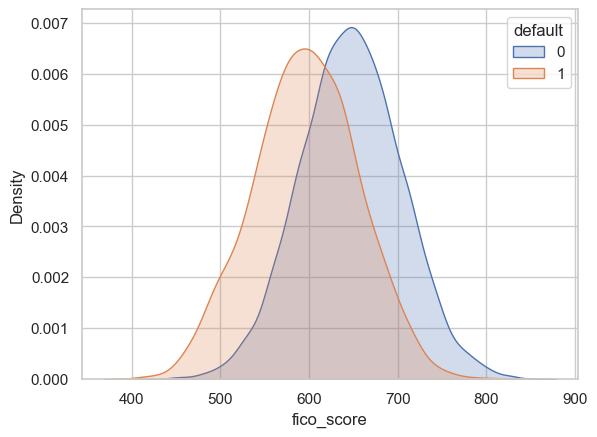

In [7]:
sns.kdeplot( x = df['fico_score'].loc[df['default'] == 0], hue=df['default'] , fill=True)
sns.kdeplot( x = df['fico_score'].loc[df['default'] == 1], hue=df['default'], fill=True)

<AxesSubplot:xlabel='debt_income_ratio', ylabel='Density'>

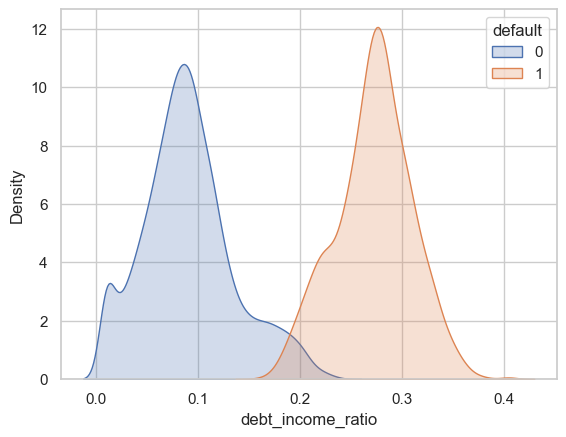

In [8]:
sns.kdeplot( x = df['debt_income_ratio'].loc[df['default'] == 0], hue=df['default'] , fill=True)
sns.kdeplot( x = df['debt_income_ratio'].loc[df['default'] == 1], hue=df['default'], fill=True)

<AxesSubplot:xlabel='total_debt_outstanding', ylabel='Density'>

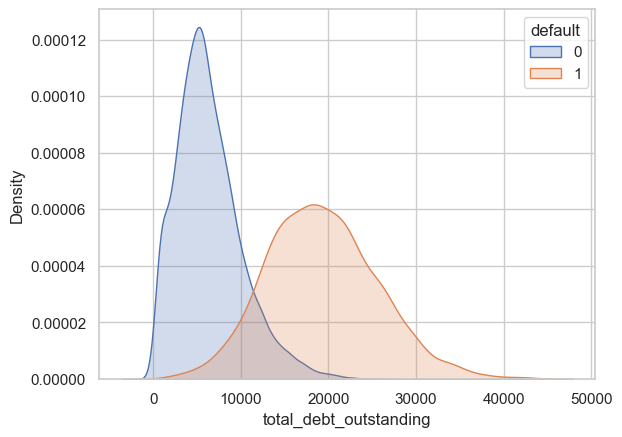

In [9]:
sns.kdeplot( x = df['total_debt_outstanding'].loc[df['default'] == 0], hue=df['default'] , fill=True)
sns.kdeplot( x = df['total_debt_outstanding'].loc[df['default'] == 1], hue=df['default'], fill=True)
# This makes it clear that debt income ratio is a better indecator than total debt 

<AxesSubplot:xlabel='loan_amt_outstanding', ylabel='Density'>

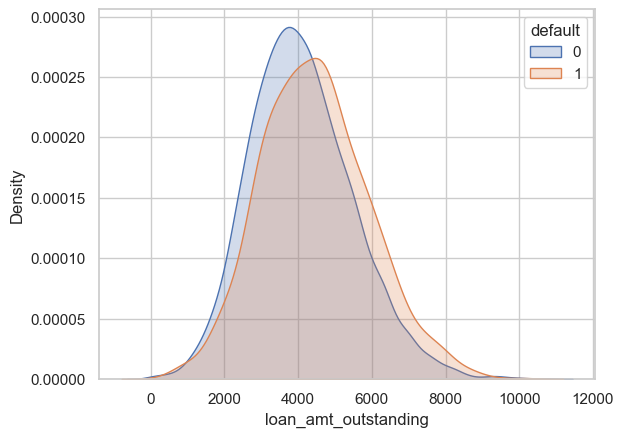

In [10]:
sns.kdeplot( x = df['loan_amt_outstanding'].loc[df['default'] == 0], hue=df['default'] , fill=True)
sns.kdeplot( x = df['loan_amt_outstanding'].loc[df['default'] == 1], hue=df['default'], fill=True)
#loan amout outstanding is not meaningful 

<AxesSubplot:xlabel='income', ylabel='Density'>

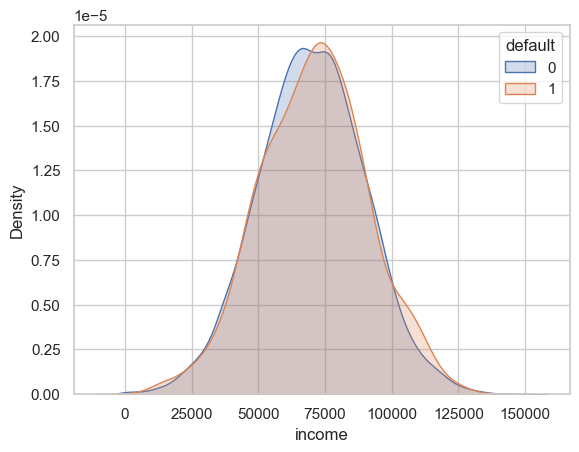

In [11]:
sns.kdeplot( x = df['income'].loc[df['default'] == 0], hue=df['default'] , fill=True)
sns.kdeplot( x = df['income'].loc[df['default'] == 1], hue=df['default'], fill=True)
#income is also not meaningful

<AxesSubplot:xlabel='years_employed', ylabel='Density'>

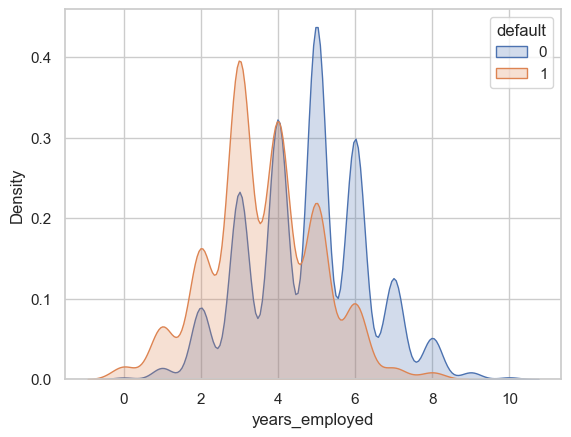

In [12]:
sns.kdeplot( x = df['years_employed'].loc[df['default'] == 0], hue=df['default'] , fill=True)
sns.kdeplot( x = df['years_employed'].loc[df['default'] == 1], hue=df['default'], fill=True)

In [13]:
#remove customerID as its not an indicator 
df_final = df.copy()
df_final.drop(['customer_id'], axis=1, inplace=True)
df_final.columns.values


array(['credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default', 'debt_income_ratio'], dtype=object)

In [14]:
# we need to have balanced classes so use over sampling  with smote 
X = df_final.loc[:, df_final.columns != 'default']
y = df_final.loc[:, df_final.columns == 'default']
os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns = X_train.columns
os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['default'])
                                                 
# we can Check the numbers of our data
print('length of oversampled data is',len(os_data_X))
print('Number of no default in oversampled data',len(os_data_y[os_data_y['default']==0]))
print('Number of default',len(os_data_y[os_data_y['default']==1]))
print('Proportion of no default data in oversampled data is ',len(os_data_y[os_data_y['default']==0])/len(os_data_X))
print('Proportion of default data in oversampled data is ',len(os_data_y[os_data_y['default']==1])/len(os_data_X))



length of oversampled data is 10898
Number of no default in oversampled data 5449
Number of default 5449
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [15]:
df_vars=df_final.columns.values.tolist()
y=['default']
X=[i for i in df_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

c:\Users\mabon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ True False False False  True False  True]
[1 3 4 5 1 2 1]


In [16]:
data_X1 = pd.DataFrame({
 'Feature': os_data_X.columns,
 'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])
# This agree with our eailer insights !!! 

,Feature,Importance
0,credit_lines_outstanding,1
4,years_employed,1
6,debt_income_ratio,1
5,fico_score,2
1,loan_amt_outstanding,3
2,total_debt_outstanding,4
3,income,5


In [17]:
#implimenting Log reg
cols=[]
for i in range (0, len(data_X1['Importance'])):
    if data_X1['Importance'][i] == 1:   
        cols.append(data_X1['Feature'][i])
    if data_X1['Importance'][i] == 2:   
        cols.append(data_X1['Feature'][i])
X=os_data_X[cols]
y=os_data_y['default']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.018919
         Iterations 14
                              Results: Logit
Model:                  Logit                Method:               MLE     
Dependent Variable:     default              Pseudo R-squared:     0.973   
Date:                   2023-08-28 19:49     AIC:                  420.3577
No. Observations:       10898                BIC:                  449.5430
Df Model:               3                    Log-Likelihood:       -206.18 
Df Residuals:           10894                LL-Null:              -7553.9 
Converged:              1.0000               LLR p-value:          0.0000  
No. Iterations:         14.0000              Scale:                1.0000  
---------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025  0.975] 
---------------------------------------------------------------------------
credit_lines_out

In [18]:
pvalue = pd.DataFrame(result.pvalues,columns= ['p_value'],)

pvalue

# All less than 0.05!

,p_value
credit_lines_outstanding,1.901988e-35
years_employed,4.220724e-38
fico_score,7.101523e-40
debt_income_ratio,3.762379e-28


In [19]:
pvs=[]
for i in range (0, len(pvalue['p_value'])):
 if pvalue['p_value'][i] < 0.05:
     pvs.append(pvalue.index[i])
if 'const' in pvs:
 pvs.remove('const')
else:
   pvs 
print(pvs)
print(len(pvs))



X=os_data_X[pvs]
y=os_data_y['default']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

['credit_lines_outstanding', 'years_employed', 'fico_score', 'debt_income_ratio']
4
Optimization terminated successfully.
         Current function value: 0.018919
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10898
Model:                          Logit   Df Residuals:                    10894
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Aug 2023   Pseudo R-squ.:                  0.9727
Time:                        19:49:33   Log-Likelihood:                -206.18
converged:                       True   LL-Null:                       -7553.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set:'+ str(accuracy_score(y_test, y_pred)))

# very good accuracy 

Accuracy of logistic regression classifier on test set:0.9872115651932166


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# confusion matrix also looking great !!!

[[1804   30]
 [  16 1747]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# accurcay looking almost perfect !!

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1834
           1       0.98      0.99      0.99      1763

    accuracy                           0.99      3597
   macro avg       0.99      0.99      0.99      3597
weighted avg       0.99      0.99      0.99      3597



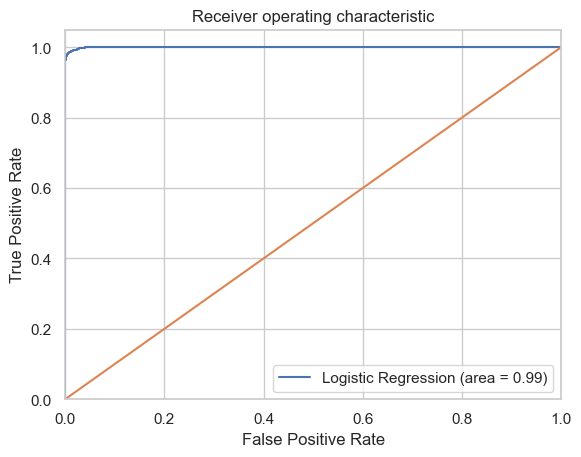

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

In [29]:
df['PD'] = logreg.predict_proba(df[X_train.columns])[:,1]
#recovery rate  10% so expected loss = PD*0.10
df[['customer_id', 'PD']].head(10)
print((df['PD']).describe())
df

count    1.000000e+04
mean     1.999068e-01
std      3.870652e-01
min      1.180062e-14
25%      8.991863e-09
50%      2.008966e-07
75%      5.964727e-03
max      1.000000e+00
Name: PD, dtype: float64


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_income_ratio,PD
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.050173,2.023876e-09
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.308789,1.000000e+00
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.030787,1.604326e-08
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.033645,1.733775e-09
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.075435,7.642302e-08
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,0.059818,4.198334e-10
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,0.068253,1.621379e-09
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,0.126021,5.348225e-04
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,0.020481,4.417846e-07


In [31]:
#recovery rate  10% so expected loss = PD*0.10*total_debt_outstanding 
P_D = df['PD'].values
df['Expected_loss'] = 0.10*P_D*total_debt_outstanding
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_income_ratio,PD,Expected_loss
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.050173,2.023876e-09,7.924429e-07
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.308789,1.000000e+00,8.228752e+02
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.030787,1.604326e-08,3.253303e-06
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.033645,1.733775e-09,4.337438e-07
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.075435,7.642302e-08,1.351790e-05
...,...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,0.059818,4.198334e-10,1.072142e-07
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,0.068253,1.621379e-09,8.849753e-07
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,0.126021,5.348225e-04,2.574149e-01
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,0.020481,4.417846e-07,4.608253e-05


In [25]:
# Bad data [7,1,500,0.5], good data [0,5,700,0.1]

new_data = np.array([0,5,700,0.1]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("This new loan applicant has a "+ str(new_pred), "chance of defaulting on a new debt")


This new loan applicant has a 4.324571482425474e-10 chance of defaulting on a new debt


c:\Users\mabon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
